# Analysis of ATLAS-GAN results

Let's take a look at the results of the DCGAN trained to generate ATLAS RPV SUSY events.

In [1]:
from __future__ import print_function

import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
results_dir = '/global/cscratch1/sd/sfarrell/atlas_gan/AtlasDCGAN_001'

In [3]:
ls $results_dir

README                dis_outputs_real.npy  gen_samples.npy
dis_losses.npy        discriminator.torch   generator.torch
dis_outputs_fake.npy  gen_losses.npy        out.log


In [7]:
# Load the result arrays
dis_losses = np.load(os.path.join(results_dir, 'dis_losses.npy'))
gen_losses = np.load(os.path.join(results_dir, 'gen_losses.npy'))
dis_outputs_real = np.load(os.path.join(results_dir, 'dis_outputs_real.npy'))
dis_outputs_fake = np.load(os.path.join(results_dir, 'dis_outputs_fake.npy'))
gen_samples = np.load(os.path.join(results_dir, 'gen_samples.npy'))

<IPython.core.display.Javascript object>


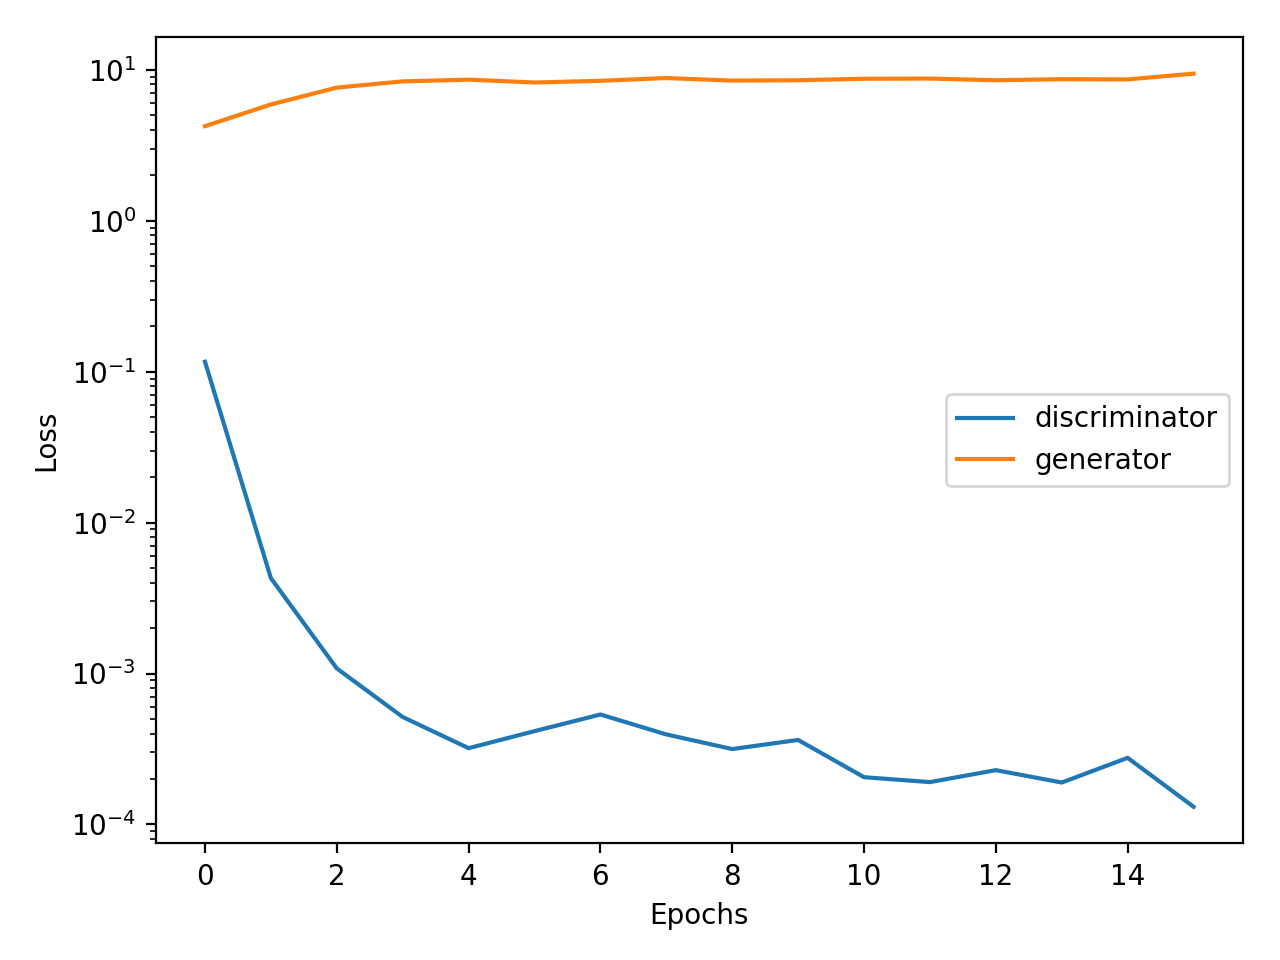

In [5]:
# Plot training loss
plt.figure()
plt.semilogy(dis_losses, label='discriminator')
plt.semilogy(gen_losses, label='generator')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.tight_layout()

<IPython.core.display.Javascript object>


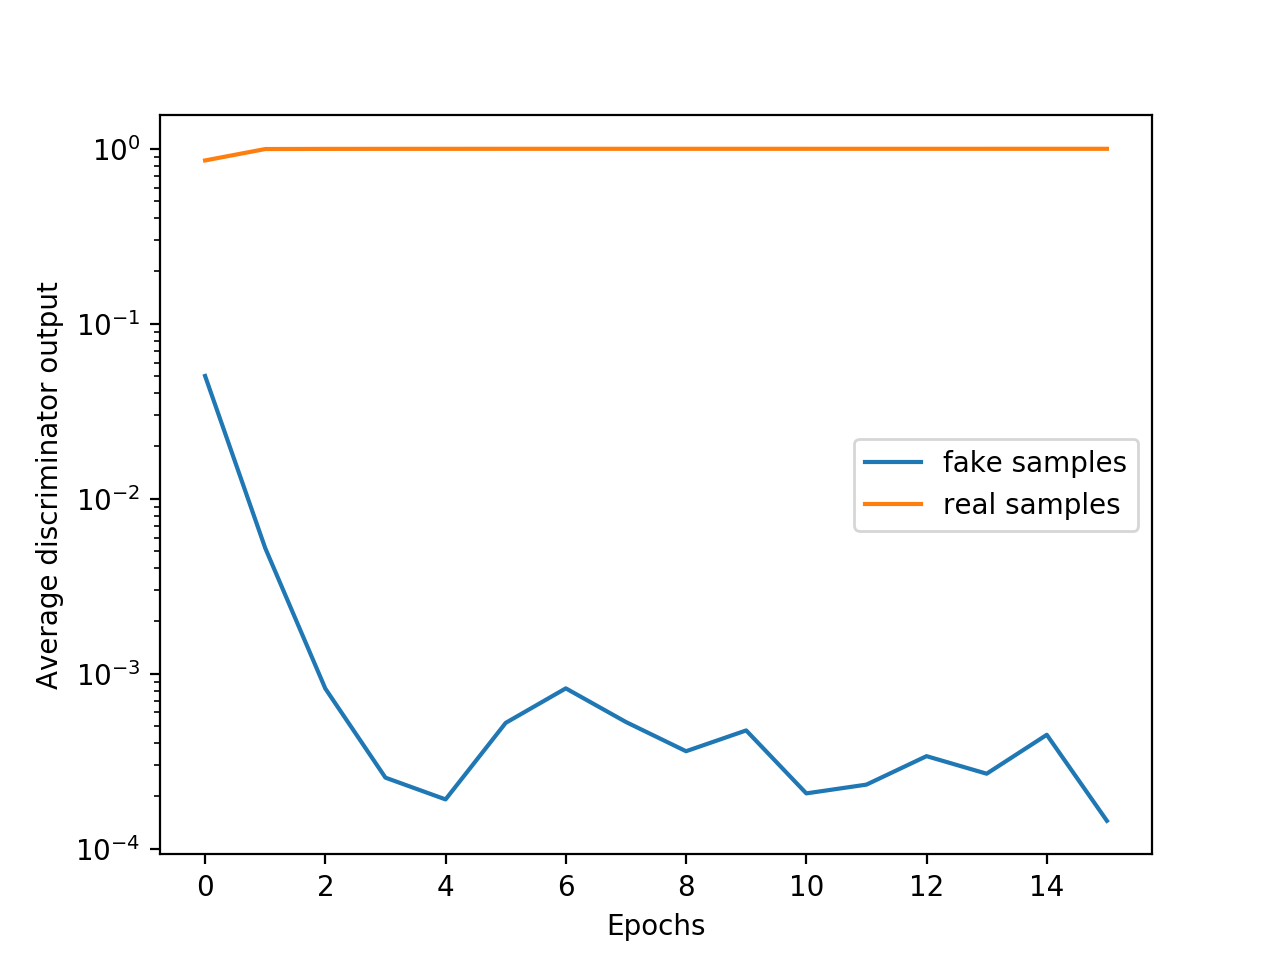

In [6]:
# Plot the discriminator average outputs per epoch
plt.figure()
plt.semilogy(dis_outputs_fake, label='fake samples')
plt.semilogy(dis_outputs_real, label='real samples')
plt.legend(loc=0)
plt.xlabel('Epochs')
plt.ylabel('Average discriminator output')

In [10]:
gen_samples[0].shape

(8, 64, 64)

<IPython.core.display.Javascript object>


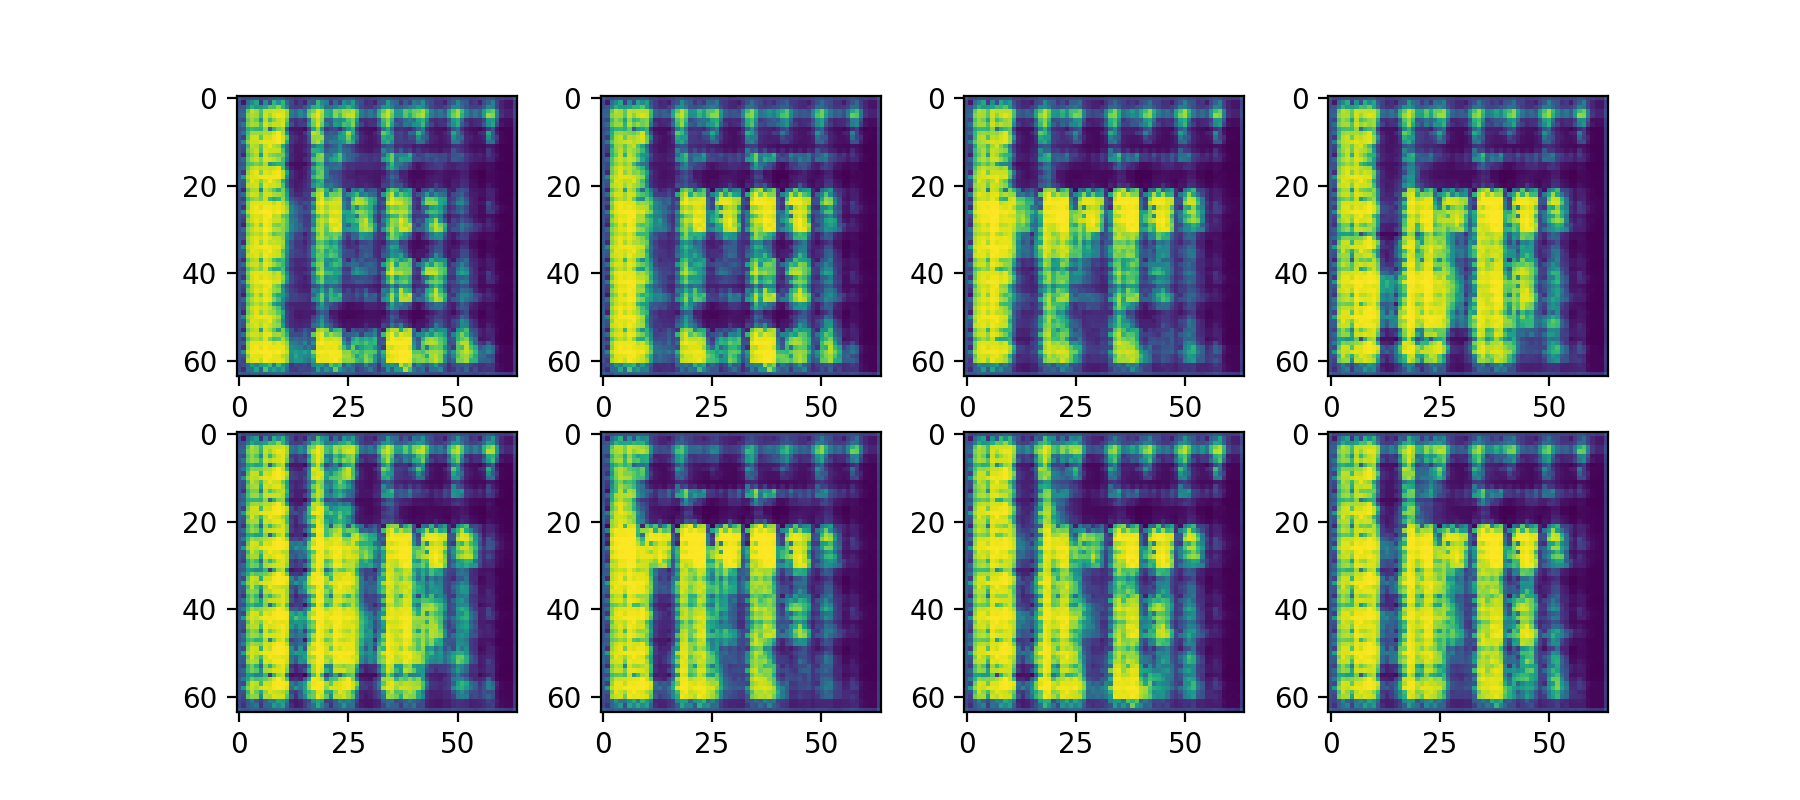

In [17]:
# Draw some samples from last epoch
_, axs = plt.subplots(2, 4, figsize=(9,4))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(gen_samples[-1,i])